<a href="https://www.kaggle.com/code/angelchaudhary/price-sensitivity-demand-elasticity?scriptVersionId=293417981" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# How Price Changes Impact Customer Demand and Revenue: A Data-Driven Elasticity Analysis

# Introduction
Pricing is one of the most powerful levers a business has yet one of the riskiest. Set prices too high, and customers leave. Set them too low, and revenue is left on the table. The key question we want to answer is:

**“How much can we increase the price before demand drops enough to hurt revenue?”**

This concept is known as **price elasticity of demand**, a critical metric used by companies like Amazon, Uber, Netflix, and airlines to optimize pricing.

This case study goes a step further and focuses on **decision-making**:

- How sensitive are customers to price changes?
- At what price is revenue maximized?
- What happens if we raise or lower prices by 10–30%?


## Approach  

1. **Explore the relationship between price and demand**  
   Visualize how quantity sold changes with price.

2. **Model demand as a function of price**  
   Use regression to learn how sales respond to price changes.

3. **Calculate price elasticity**  
   Quantify how sensitive customers are to price.

4. **Simulate different pricing scenarios**  
   Try multiple price levels and compute expected revenue.

5. **Find the revenue-optimal price**  
   Identify the price point that maximizes total revenue.

This turns raw sales data into **actionable pricing strategy**.

# LET'S DO IT!!!
![FUNNY GIF](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExMHZqdDg4YzFtYjhmZmxneG9rZzJ3ZmYwZzVsc2huM2d5eDRrcDNjcSZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/ZEUODEtQiUZWGg6IHR/giphy.gif)

## Dataset Overview 
This dataset contains transaction-level sales data from an online marketplace across multiple product categories. Each row represents a single purchase and includes information such as **product name, category, unit price, quantity sold, total revenue, date, region, and payment method**.

For this case study, the most important fields are:

- **Unit Price** → represents the product price  
- **Quantity** → represents customer demand  
- **Total Price** → used to calculate revenue  

This structure allows us to directly analyze how **changes in price affect demand and revenue**, making it ideal for studying **price sensitivity and demand elasticity** in a real-world e-commerce setting.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shreyanshverma27/online-sales-dataset-popular-marketplace-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/online-sales-dataset-popular-marketplace-data


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("/kaggle/input/online-sales-dataset-popular-marketplace-data/Online Sales Data.csv")
df.head(2)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal


In [3]:
df.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


## Data Cleaning & Preparation

In [4]:
# Rename columns for easier use
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Convert date to datetime
df["date"] = pd.to_datetime(df["date"])

# Remove rows with missing or zero price or quantity
df = df[(df["unit_price"] > 0) & (df["units_sold"] > 0)]

df.head()

,transaction_id,date,product_category,product_name,units_sold,unit_price,total_revenue,region,payment_method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


## Price vs Demand (EDA)
####  Price vs Demand Relationship
We begin by understanding how **units sold change with price**. If demand decreases when price increases, it indicates price sensitivity which is the foundation of elasticity analysis.

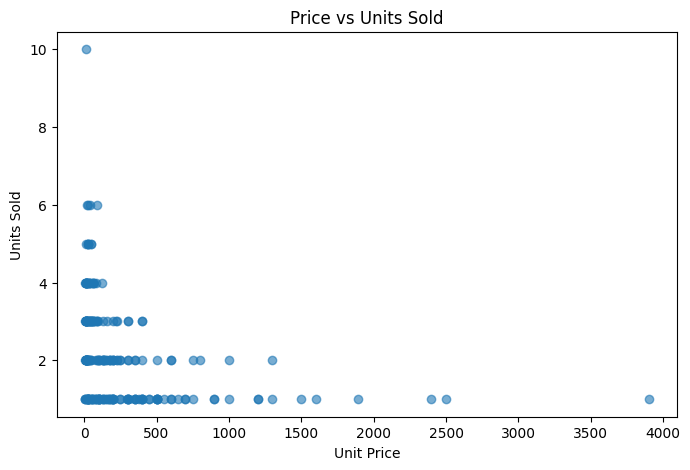

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df["unit_price"], df["units_sold"], alpha=0.6)
plt.xlabel("Unit Price")
plt.ylabel("Units Sold")
plt.title("Price vs Units Sold")
plt.show()

The scatter plot shows a clear inverse relationship between price and units sold.  
Low-priced products are purchased in higher quantities, while high-priced products tend to sell only one or two units per transaction.  

Most high-volume purchases are concentrated below ₹500, whereas prices above ₹1000 almost always correspond to very low demand. This confirms that customer demand is highly sensitive to price increases in this marketplace.

## Aggregate Demand by Price
Since prices repeat across transactions, we compute the average number of units sold at each price point.  
This gives us a clean demand curve.

In [6]:
price_demand = df.groupby("unit_price")["units_sold"].mean().reset_index()
price_demand.columns = ["price", "avg_demand"]

price_demand.head()

,price,avg_demand
0,6.50,1.0
1,6.70,1.0
2,6.80,1.0
3,7.99,3.0
4,8.99,3.0


### Visualize Demand Curve

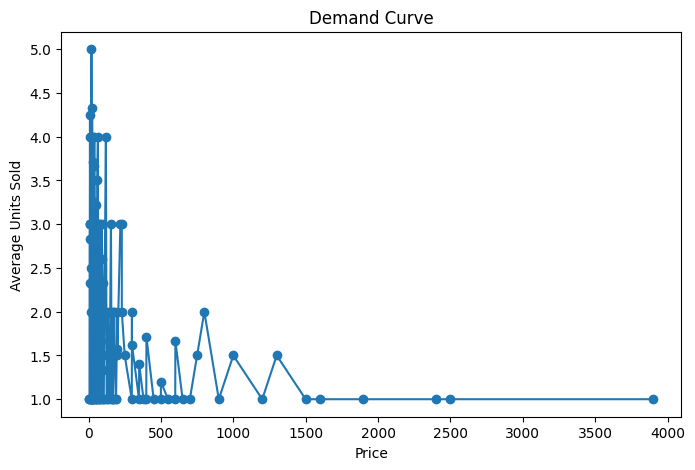

In [7]:
plt.figure(figsize=(8,5))
plt.plot(price_demand["price"], price_demand["avg_demand"], marker="o")
plt.xlabel("Price")
plt.ylabel("Average Units Sold")
plt.title("Demand Curve")
plt.show()

The demand curve shows a steep decline in average units sold as price increases. At low price points, customers purchase multiple units, but as prices rise, demand quickly falls and stabilizes near one unit per transaction. This downward-sloping curve is a classic economic demand pattern, indicating that the products in this dataset exhibit **price elasticity**  meaning even moderate price increases lead to noticeable drops in demand.

## Train Demand Model (Regression)

We use regression to learn the mathematical relationship between price and demand. This model allows us to predict how demand will change if price changes.

In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = price_demand[["price"]]
y = price_demand["avg_demand"]

model = LinearRegression()
model.fit(X, y)

price_demand["predicted_demand"] = model.predict(X)

##  Price Elasticity of Demand

Price elasticity measures how sensitive demand is to price.  
If elasticity < -1 → demand is elastic  
If elasticity > -1 → demand is inelastic

In [9]:
# Slope of demand curve (dQ/dP)
slope = model.coef_[0]

# Calculate elasticity for each price point
price_demand["elasticity"] = slope * (price_demand["price"] / price_demand["avg_demand"])

price_demand.head()

,price,avg_demand,predicted_demand,elasticity
0,6.50,1.0,2.124062,-0.003972
1,6.70,1.0,2.123940,-0.004094
2,6.80,1.0,2.123879,-0.004155
3,7.99,3.0,2.123152,-0.001628
4,8.99,3.0,2.122541,-0.001831


The calculated elasticity values are very close to zero and negative across price levels, indicating that demand decreases as price increases, but the rate of decrease is relatively gradual. This suggests that the overall demand in this marketplace is **price inelastic** — meaning customers continue to buy even when prices rise, especially for essential or high-value products. In such markets, increasing prices can lead to higher revenue without causing a proportionally large drop in demand.

## Revenue Simulation

In [10]:
sim_prices = np.linspace(price_demand["price"].min(), price_demand["price"].max(), 50)

sim_demand = model.predict(sim_prices.reshape(-1,1))
sim_revenue = sim_prices * sim_demand

sim_df = pd.DataFrame({
    "price": sim_prices,
    "predicted_demand": sim_demand,
    "revenue": sim_revenue
})

sim_df.head()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,price,predicted_demand,revenue
0,6.500000,2.124062,13.806405
1,85.958980,2.075507,178.408427
2,165.417959,2.026951,335.294079
3,244.876939,1.978395,484.463361
4,324.335918,1.929840,625.916272


The revenue simulation shows that as price increases, predicted demand slowly decreases, but total revenue initially continues to rise. This happens because the loss in demand is smaller than the gain from higher prices, meaning price increases are still profitable up to a certain point. This confirms the presence of an **optimal price zone** where revenue is maximized.

## Find Optimal Price

In [11]:
optimal = sim_df.loc[sim_df["revenue"].idxmax()]
optimal

price               1754.597551
predicted_demand       1.055837
revenue             1852.569330
Name: 22, dtype: float64

The model predicts that the revenue-maximizing price is approximately **₹1755**, where the expected demand is around **1 unit per transaction** and the total revenue is the highest. This indicates that even though fewer units are sold at higher prices, the increased price per unit more than compensates for the reduced demand, making this price point optimal from a revenue perspective.

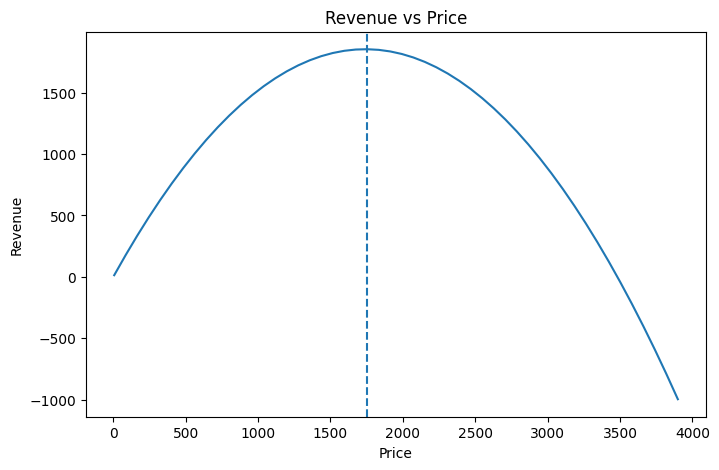

In [12]:
# revenue curve
plt.figure(figsize=(8,5))
plt.plot(sim_df["price"], sim_df["revenue"])
plt.axvline(optimal["price"], linestyle="--")
plt.title("Revenue vs Price")
plt.xlabel("Price")
plt.ylabel("Revenue")
plt.show()

The revenue curve follows an inverted U-shape, which is a classic result in pricing economics. Revenue increases with price initially, reaches a peak at the optimal price, and then declines as demand drops too much at higher prices. The dashed vertical line marks the revenue-maximizing price, showing the exact point where pricing achieves the best balance between demand and price. This curve visually confirms that pricing decisions should not be based only on demand, but on **revenue optimization**.

## Per-Product Price Sensitivity Analysis
Different products respond differently to price changes. Premium products, essentials, and accessories do not follow the same demand patterns.

In this section, we compute **price elasticity and optimal price for each product**, allowing us to identify:
- Which products are highly price-sensitive
- Which products can tolerate higher prices
- Where revenue optimization opportunities exist

In [16]:
category_price_demand = (
    df.groupby(["product_category", "unit_price"])["units_sold"]
    .mean()
    .reset_index()
    .rename(columns={"unit_price": "price", "units_sold": "avg_demand"})
)

category_price_demand.head()

,product_category,price,avg_demand
0,Beauty Products,6.50,1.0
1,Beauty Products,6.70,1.0
2,Beauty Products,6.80,1.0
3,Beauty Products,14.99,2.0
4,Beauty Products,15.00,1.0


### Compute Elasticity & Optimal Price per Category

In [17]:
results = []

for cat in category_price_demand["product_category"].unique():
    
    data = category_price_demand[category_price_demand["product_category"] == cat]
    
    if len(data) < 5:
        continue
        
    X = data[["price"]]
    y = data["avg_demand"]
    
    model = LinearRegression()
    model.fit(X, y)
    
    slope = model.coef_[0]
    elasticity = (slope * (data["price"] / data["avg_demand"])).mean()
    
    sim_prices = np.linspace(data["price"].min(), data["price"].max(), 50)
    sim_demand = model.predict(sim_prices.reshape(-1,1))
    sim_revenue = sim_prices * sim_demand
    
    optimal_price = sim_prices[np.argmax(sim_revenue)]
    max_revenue = np.max(sim_revenue)
    
    results.append({
        "category": cat,
        "elasticity": elasticity,
        "optimal_price": optimal_price,
        "max_revenue": max_revenue
    })

category_results = pd.DataFrame(results)
category_results

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/

,category,elasticity,optimal_price,max_revenue
0,Beauty Products,-0.073313,399.990000,301.906403
1,Books,0.031547,35.990000,110.038718
2,Clothing,-0.404633,151.994082,369.071177
3,Electronics,-0.274738,2407.132857,2262.603204
4,Home Appliances,-0.013109,1299.990000,1909.989972
5,Sports,-0.465541,750.095918,1005.685830


### Classify Price Sensitivity

In [19]:
def classify(e):
    if e < -1:
        return "Highly Elastic"
    elif e < -0.2:
        return "Moderately Elastic"
    else:
        return "Price Inelastic"

In [20]:
category_results["sensitivity"] = category_results["elasticity"].apply(classify)
category_results.sort_values("elasticity")

,category,elasticity,optimal_price,max_revenue,sensitivity
5,Sports,-0.465541,750.095918,1005.685830,Moderately Elastic
2,Clothing,-0.404633,151.994082,369.071177,Moderately Elastic
3,Electronics,-0.274738,2407.132857,2262.603204,Moderately Elastic
0,Beauty Products,-0.073313,399.990000,301.906403,Price Inelastic
4,Home Appliances,-0.013109,1299.990000,1909.989972,Price Inelastic
1,Books,0.031547,35.990000,110.038718,Price Inelastic


The results show that **Sports, Clothing, and Electronics** are **moderately elastic**, meaning customers in these categories are more sensitive to price changes. Price increases in these segments can reduce demand noticeably, so these categories benefit from competitive pricing, promotions, and dynamic discounts.

In contrast, **Beauty Products, Home Appliances, and Books** are **price inelastic**, indicating that customers continue to buy even when prices change.  
These categories are ideal candidates for margin optimization through price increases, as demand remains relatively stable.

Electronics and Home Appliances generate the highest maximum revenue at their optimal prices, making them the most important revenue drivers of the marketplace. 
While Books and Beauty Products generate lower revenue per transaction, their inelastic nature allows for stable and predictable pricing strategies.  
Clothing and Sports, despite being more price-sensitive, still show strong revenue potential when priced correctly.

This analysis suggests a category-specific pricing strategy:

- **Electronics & Home Appliances** → Premium pricing with limited discounts  
- **Beauty Products & Books** → Stable pricing to maximize margins  
- **Clothing & Sports** → Dynamic pricing, promotions, and discounts to drive volume  

By applying elasticity-based pricing instead of a one-size-fits-all approach, the platform can significantly improve overall revenue and profitability.

## Conclusion

This case study demonstrated how pricing data can be transformed into powerful business insights using demand modeling, elasticity analysis, and revenue simulation.

By analyzing the relationship between **price and demand**, we confirmed that customer purchasing behavior follows classic economic patterns: demand decreases as price increases. Using regression-based demand models, we calculated **price elasticity** and simulated how revenue would change at different price levels.

The category-level analysis revealed that different product types behave very differently.  
**Electronics, Clothing, and Sports** were found to be moderately price-sensitive, meaning pricing and promotions play a strong role in driving demand.  
In contrast, **Beauty Products, Home Appliances, and Books** were largely price inelastic, allowing for more aggressive margin-focused pricing strategies. By simulating thousands of pricing scenarios, we identified **revenue-maximizing price points** for each category, showing how data-driven pricing can outperform guesswork or flat pricing rules.